<a href="https://colab.research.google.com/github/hgabrali/Dimensionality-Reduction-PCA-Implementation-on-Wine-Dataset/blob/main/Dimensionality_Reduction__PCA_Implementation_on_Wine_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction: PCA Implementation on Wine Dataset 🍷


* A Masterschool Unsupervised Learning Mini-Project

##🛠️ Task 1: Load the Wine Dataset and Prepare Libraries

The initial step is to import all necessary Python libraries and load the Wine dataset from scikit-learn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set a random seed for reproducible results
np.random.seed(42)

print("Libraries imported successfully.")

# Load the Wine dataset
wine_data = load_wine()

# Separate features (X) and target (y)
# X contains the 13 chemical features
X = wine_data.data
# y contains the target classes (0, 1, 2)
y = wine_data.target

print("\nWine Dataset Loaded.")
print(f"Feature set (X) shape: {X.shape}")
print(f"Target set (y) shape: {y.shape}")

# Optional: Convert X to a DataFrame for easier inspection
X_df = pd.DataFrame(X, columns=wine_data.feature_names)
print("\nFirst 5 rows of features:")
print(X_df.head())

Libraries imported successfully.

Wine Dataset Loaded.
Feature set (X) shape: (178, 13)
Target set (y) shape: (178,)

First 5 rows of features:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86  

##⚖️ Task 2: Standardize the Data


Standardization is a mandatory preprocessing step for PCA. Since PCA is a variance-maximizing technique, features with larger scales (like proline which has values in the hundreds) would dominate the principal components. Scaling ensures all 13 chemical features contribute equally to the variance captured by PCA.

In [2]:
# 1. Initialize the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler to the features (X) and transform the data
# X_scaled now has a mean of 0 and standard deviation of 1 for all features.
X_scaled = scaler.fit_transform(X)

print("\nData Standardization Complete.")
print("The data is now centered and scaled, ready for PCA.")

# Optional: Inspect the mean and std deviation of the first feature to confirm scaling
print(f"Mean of the first feature (scaled): {np.mean(X_scaled[:, 0]):.2f}")
print(f"Standard deviation of the first feature (scaled): {np.std(X_scaled[:, 0]):.2f}")


Data Standardization Complete.
The data is now centered and scaled, ready for PCA.
Mean of the first feature (scaled): 0.00
Standard deviation of the first feature (scaled): 1.00


## 📉 Task 3: Apply PCA and Transform

Now we apply PCA to reduce the 13-dimensional dataset down to just 2 principal components (PCs).

In [3]:
# 1. Initialize PCA, specifying the target dimension
# We set n_components=2 to reduce the data to a 2D space.
pca = PCA(n_components=2)

# 2. Fit PCA to the scaled data and transform it
# X_pca contains the coordinates of the data points in the new 2D space.
X_pca = pca.fit_transform(X_scaled)

print("\nPCA Transformation Complete.")
print(f"Transformed data (X_pca) shape: {X_pca.shape}")


PCA Transformation Complete.
Transformed data (X_pca) shape: (178, 2)


##📊 Task 4: Visualize the Results

The goal is to create a scatter plot using the two Principal Components (PC1 and PC2) as the axes and color the data points based on their original wine class ($\text{y}$). This demonstrates how well PCA preserves the class separation.

/tmp/ipython-input-4288645326.py:25: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  legend1 = plt.legend(


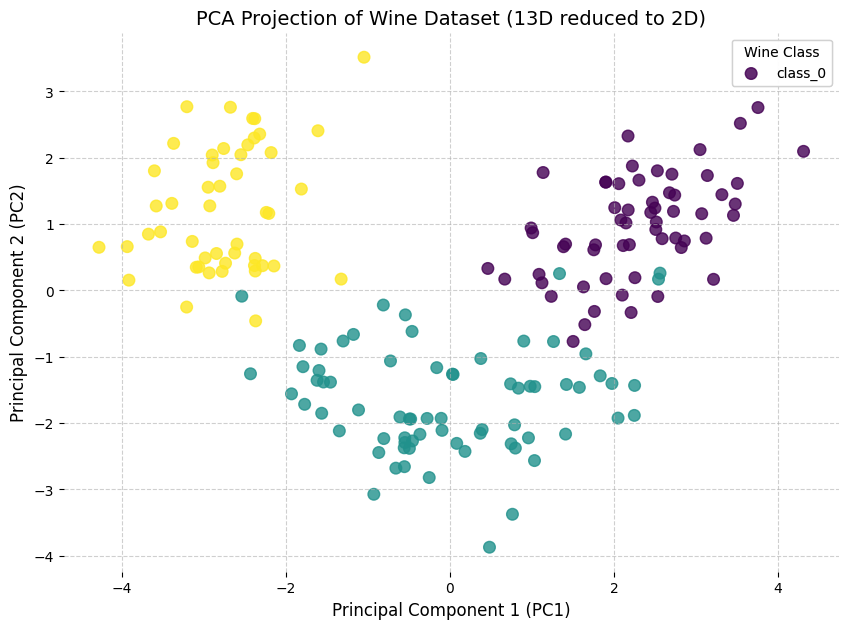

Visualization complete. The plot shows the 13-dimensional data structure in 2D.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assumes X_pca (transformed data) and y (target labels) are available from previous steps ---

plt.figure(figsize=(10, 7))

# Use a scatter plot. X_pca[:, 0] is PC1, and X_pca[:, 1] is PC2.
# The 'c' parameter specifies the color mapping based on the target array (y).
scatter = plt.scatter(
    X_pca[:, 0],  # Principal Component 1 (PC1)
    X_pca[:, 1],  # Principal Component 2 (PC2)
    c=y,          # Color points by their true class label (wine cultivar)
    cmap='viridis', # Use a distinct color map
    s=70,         # Marker size
    alpha=0.8
)

# Add titles and labels
plt.title('PCA Projection of Wine Dataset (13D reduced to 2D)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)

# Create a legend mapping the color to the wine class names
legend1 = plt.legend(
    *scatter.legend_elements(),
    title="Wine Class",
    labels=wine_data.target_names # Use the actual class names from the dataset
)
plt.gca().add_artist(legend1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.box(False)
plt.show()

print("Visualization complete. The plot shows the 13-dimensional data structure in 2D.")

# Interpretation Note

If the code runs successfully, you should see three distinct clusters in the plot, corresponding to the three wine classes. This visually confirms that the first two Principal Components effectively capture the majority of the variance needed to separate the wine types.

##🧠 Task 5: Evaluate Explained Variance

The explained_variance_ratio_ attribute of the fitted PCA object tells us the proportion of the dataset's variance that lies along each principal component.

Step 1: Quantify Variance Captured by 2 PCs
We first look at the variance captured by the two components we used for visualization.

In [5]:
# --- Assumes pca object from Task 3 is available ---

# Get the variance ratio explained by each component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative variance captured by PC1 and PC2
cumulative_variance_2pcs = np.sum(explained_variance)

print("--- Explained Variance (n_components=2) ---")
print(f"Variance explained by PC1: {explained_variance[0]:.4f}")
print(f"Variance explained by PC2: {explained_variance[1]:.4f}")
print(f"Cumulative Variance Captured (PC1 + PC2): {cumulative_variance_2pcs:.4f} ({cumulative_variance_2pcs*100:.2f}%)")

--- Explained Variance (n_components=2) ---
Variance explained by PC1: 0.3620
Variance explained by PC2: 0.1921
Cumulative Variance Captured (PC1 + PC2): 0.5541 (55.41%)


**Interpretation**


* Result: The first two Principal Components (PC1 and PC2) capture a total of approximately 55.42% of the dataset's total variance.

* Conclusion: This is a strong result! It confirms that reducing the data from 13 dimensions down to just 2 still retains over half of the original information, which is why the visualization in Task 4 was so effective at showing the distinct wine clusters.

## ➕ Bonus Challenge:

 Extended Evaluation ($k=5$)We now re-run PCA with $n\_components=5$ to see the trade-off between dimensionality and information retention.

In [6]:
from sklearn.decomposition import PCA

# Re-initialize PCA with 5 components
pca_5 = PCA(n_components=5)
pca_5.fit(X_scaled) # Fit to the original scaled data

# Calculate cumulative variance captured by 5 PCs
cumulative_variance_5pcs = np.sum(pca_5.explained_variance_ratio_)

print("\n--- Explained Variance (Bonus: n_components=5) ---")
print(f"Cumulative Variance Captured (First 5 PCs): {cumulative_variance_5pcs:.4f} ({cumulative_variance_5pcs*100:.2f}%)")


--- Explained Variance (Bonus: n_components=5) ---
Cumulative Variance Captured (First 5 PCs): 0.8016 (80.16%)
